# Libraries

In [227]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler

# Import raw dataset
* preview dataset
* print variable information (# of Null values, data type)
* print basic statistic per column

In [228]:
df = pd.read_csv(".\\nba_logreg.csv")

df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [230]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


**Notes: Normalized counting metrics**  
A game consists of 4 quarters of 12 minutes each, leading to a total of 48 minutes of gameplay.  
There can be additional time if the score is tied (5 minutes for each overtime period added).  

By looking at the Min and Max values of 'MIN' played by a player and the number of games GP, one can infer that:
* MIN is the number of minutes played **per game**, as it is the case of PTS which is also normalized by the number of games played.
* The same apply for the other metrics which were expected to be interger type, but are in fact floats (even < 1), like :
  * FGM, FGA, 3P Made, 3PA, FTM, FTA, OREB, DREB, REB, AST, STL, BLK, TOV

**Note on percetage columns:** 
* The 'XXpercent' column for variables XX = 'FG', '3P' and 'FT', are not exactly computed as XXM/XXA*100
* It could be that the XXpercent columns include a correction not specified in the description file. In which case the variable may contain relevant information.
* The discrepancy is roughly below 1%
* It is not a rounding issue.

In [231]:
# To check for values discrepancy of variables XX, for a single observation i

i = 4
XX = 'FG'

print(df.loc[i, XX+'M'])
print(df.loc[i, XX+'A'])
print(df.loc[i, XX+'M']/df.loc[i, XX+'A']*100, '%')
print(df.loc[i, XX+'%'])

1.6
3.0
53.333333333333336 %
52.4


**Notes: Rebounds**  
Verifying that OREB + DREB = REB

In [232]:

i = 156
XX = 'REB'

print(df.loc[i, 'O'+XX])
print(df.loc[i, 'D'+XX])
print(df.loc[i, 'O'+XX] + df.loc[i, 'D'+XX])
print(df.loc[i, XX])

0.6
0.9
1.5
1.5


# Data Cleaning
#### Addressing duplicates

In [233]:
print("There are", df.duplicated().sum(), "duplicates: ")

df.loc[df.duplicated(),:]

There are 12 duplicates: 


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
169,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0
243,Reggie Williams,35,24.5,10.4,4.3,12.2,35.6,0.4,1.7,22.4,...,1.9,72.7,1.6,1.8,3.4,1.7,0.8,0.6,1.8,1.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
366,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,...,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0.0
369,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,...,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0.0
504,Eddie Johnson,74,20.5,9.3,4.0,8.7,45.9,0.0,0.1,9.1,...,2.0,66.4,1.7,2.6,4.4,1.5,0.7,0.2,1.3,1.0
733,Gerald Henderson,43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,...,1.1,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1.0
824,Marcus Williams,79,16.6,6.8,2.6,6.7,39.5,0.6,2.1,28.2,...,1.1,84.7,0.4,1.7,2.1,3.3,0.4,0.0,1.8,0.0


Visualize few particular cases:

In [234]:
# Try for example
# 'Charles Smith'   : 3 players with same name, each being tripled in the dataset & with inconsistent TARGET_5Yrs
# 'Reggie Williams' : 1 player, simply duplicated on the table.
# 'Charles Jones'   : 2 players with same name, each being tripled in the dataset & with inconsistent TARGET_5Yrs

player_name = 'Charles Smith'  
df[df.Name == player_name]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
162,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
164,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,0.0
165,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
167,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,0.0
168,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0
169,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0
170,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,0.0


It is clear that there are some simple duplicates and some entries that are inconsistent: same player, same stats, different target.   

**Simple duplicates can be just removed:**

In [235]:
df.drop_duplicates(inplace = True)

# verify
print("There remain", df.duplicated().sum(), "simple duplicates")

There remain 0 simple duplicates


#### Addressing inconsistent entries

In [236]:
inconsistents = df.drop('TARGET_5Yrs', axis = 1).duplicated()

print("There are", inconsistents.sum(), "inconsistent entries: ")

df.loc[inconsistents,:].head()

There are 20 inconsistent entries: 


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
19,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,...,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1.0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1.0
121,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,...,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1.0
127,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,...,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,0.0


In [237]:
# Try for example
# 'Dee Brown' : 2 players, same name but having different stats, each having inconsistent TARGET_5Yrs.

player_name = 'Dee Brown'  
df[df.Name == player_name]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0.0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1.0


**Inconsistent entries are removed:**

In [238]:
df.drop(df.loc[inconsistents,:].index, axis=0, inplace=True)

# verify
print("There remain", df.drop('TARGET_5Yrs', axis = 1).duplicated().sum(), "inconsistent entries")

There remain 0 inconsistent entries


In [239]:
df.shape

(1308, 21)

#### Addressing NaN values

In [240]:
# replacing Nan values (only present when no 3 points attempts have been performed by a player)
df.fillna(0.0, inplace=True)

# verify:
print("There remains", df.isna().sum().sum(), "NaNs values")

There remains 0 NaNs values


# Distribution of target variable

In [241]:
df['TARGET_5Yrs'].value_counts(normalize = True)

TARGET_5Yrs
1.0    0.623853
0.0    0.376147
Name: proportion, dtype: float64

**Note: The dataset is biased having 62% of class 1 (player with career length > 5 years)**

# Distribution of features

**PLot the correlation between features only, exclude the cat features and the categorical target**   
This allows to see colinearity between the explanable variables, which can be a problem for the ML models.  
Possibly reduce the set of indep vars to a set with low collinearity.

<Axes: >

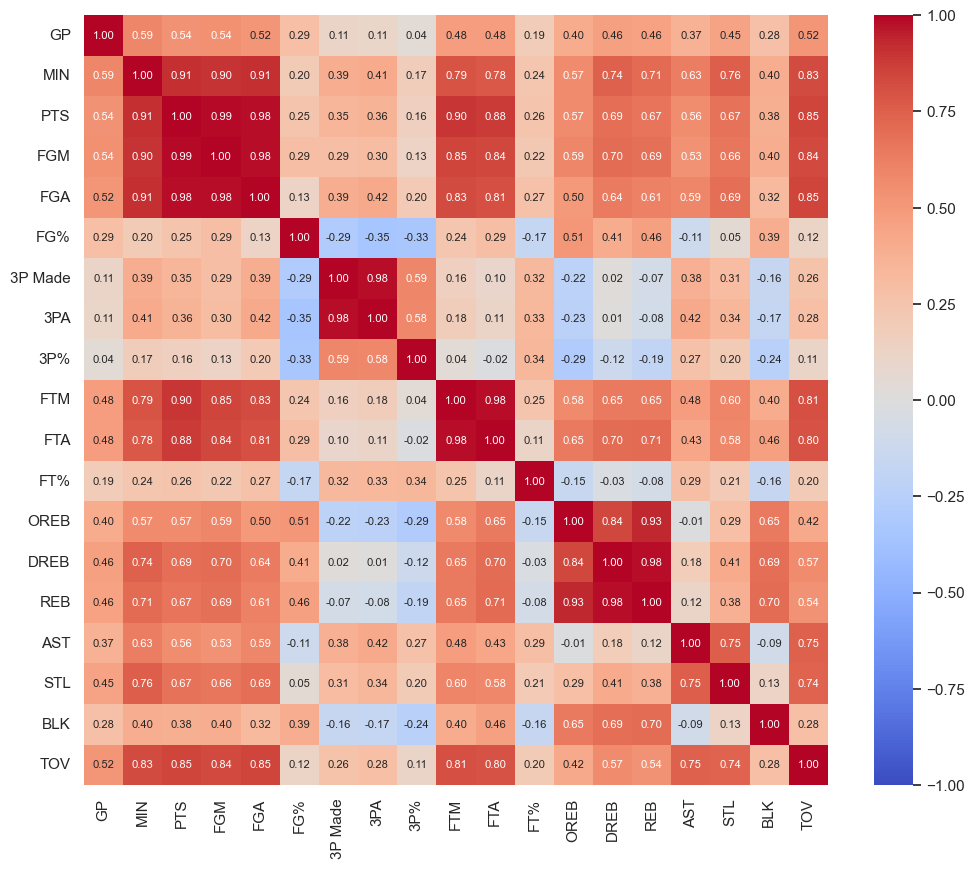

In [251]:
# sns.pairplot(df.iloc[:,1:-2], diag_kind = 'kde')

corr = df.drop(['Name', 'TARGET_5Yrs'], axis=1).corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot = True, ax = ax, cmap="coolwarm", fmt='0.2f', vmin = -1, vmax = 1, annot_kws={"fontsize":8})

#### not sure to use since the target is a categorical variable

**Note:** All numerical features are mildly correlated to the target

#### Box plot : summary statistic for each numerical variable

<Axes: >

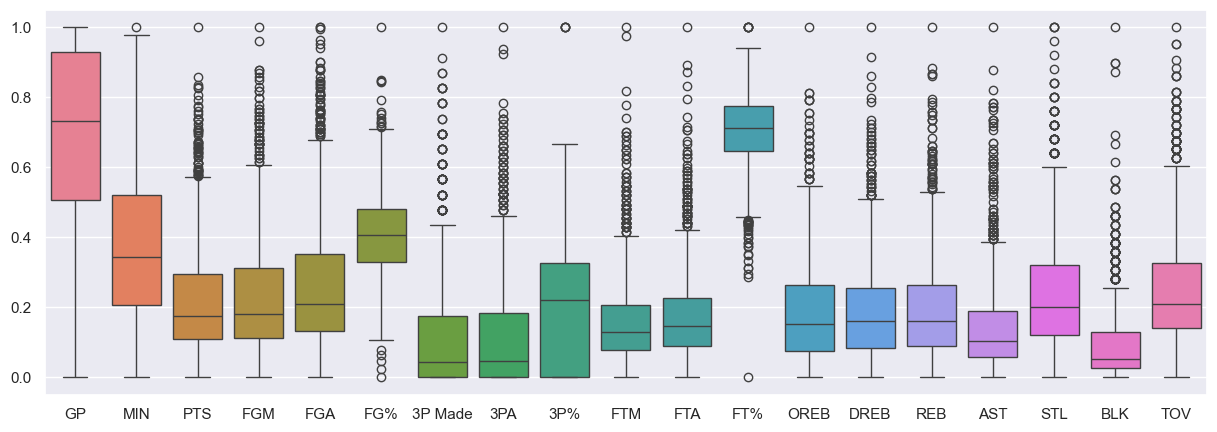

In [249]:
# separate numerical features
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values

# scale data to [0-1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_vals)

# convert back to a dataframe
df_scaled = pd.DataFrame(scaled_data, columns=paramset)

# plot the summary statistic for each normalized numerical feature
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.boxplot(data = df_scaled) #, orient='h'